In [196]:
from src.data.dataset_blond import BLOND
from src.data.dataset_blond import TYPE_CLASS
from src.features.features import *
import numpy as np
import librosa
import matplotlib.pyplot as plt

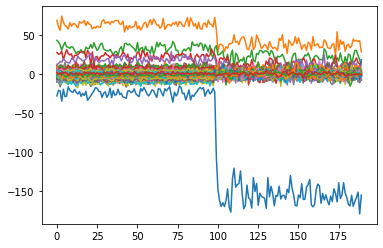

In [197]:
dataset = BLOND('all', '../data')
class_type = {v: k for k, v in TYPE_CLASS.items()}
ix = 8000  # 8000
sample = dataset[ix]

aug = RandomAugment(p=0)
sample = aug((sample[0], sample[1], None, sample[2]))
mfcc = MFCC()
_, _, torch_mfcc, class_nr = mfcc(sample)

plt.plot(torch_mfcc.T)
plt.show()

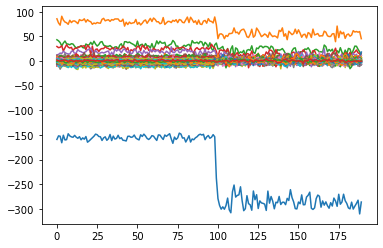

In [198]:
librosa_mfcc = librosa.feature.mfcc(y=sample[0].numpy(),
                                    sr=mfcc.measurement_frequency,
                                    n_mfcc=64,
                                    hop_length=mfcc.hop_length,
                                    n_fft=mfcc.n_fft,
                                    n_mels=64,
                                    power=2,
                                    htk=True)

librosa_mfcc = torch.as_tensor(librosa_mfcc)

#fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.plot(librosa_mfcc.T)
plt.show()

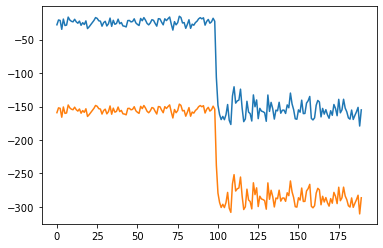

In [199]:
plt.plot(torch_mfcc[0])
plt.plot(librosa_mfcc[0])
plt.show()

In [200]:
fac = torch.zeros_like(torch_mfcc)
for i in range(len(dataset)):
    sample = dataset[i]
    sample = aug((sample[0], sample[1], None, sample[2]))
    librosa_mfcc = librosa.feature.mfcc(y=sample[0].numpy(),
                                    sr=mfcc.measurement_frequency,
                                    n_mfcc=64,
                                    hop_length=mfcc.hop_length,
                                    n_fft=mfcc.n_fft,
                                    n_mels=64,
                                    power=2,
                                    htk=True)

    librosa_mfcc = torch.as_tensor(librosa_mfcc)
    _, _, torch_mfcc, class_nr = mfcc(sample)

    fac = librosa_mfcc - torch_mfcc
fac /= len(dataset)

In [201]:
for i in range(len(dataset)):
    sample = dataset[i]
    sample = aug((sample[0], sample[1], None, sample[2]))
    librosa_mfcc = librosa.feature.mfcc(y=sample[0].numpy(),
                                    sr=mfcc.measurement_frequency,
                                    n_mfcc=64,
                                    hop_length=mfcc.hop_length,
                                    n_fft=mfcc.n_fft,
                                    n_mels=64,
                                    power=2,
                                    htk=True)

    librosa_mfcc = torch.as_tensor(librosa_mfcc)
    _, _, torch_mfcc, class_nr = mfcc(sample)

    shifted_mfcc= (librosa_mfcc.T - fac.T)
    diff = (shifted_mfcc-torch_mfcc.T).sum()
    if diff > 1:
        print(diff)

In [202]:
torch.save(fac, 'mfcc_shift.pt')
print(fac)

tensor([[-9.9675e-03, -9.9675e-03, -9.9675e-03,  ..., -9.9675e-03,
         -9.9675e-03, -9.9675e-03],
        [ 1.2791e-03,  1.2791e-03,  1.2791e-03,  ...,  1.2791e-03,
          1.2791e-03,  1.2791e-03],
        [ 1.7387e-09,  1.4489e-09, -1.4489e-10,  ...,  8.6935e-10,
          8.6935e-10,  0.0000e+00],
        ...,
        [ 6.7048e-08,  6.4739e-08,  6.3281e-08,  ...,  6.5536e-08,
          6.4766e-08,  6.4223e-08],
        [-5.5964e-09, -5.3791e-09, -3.6404e-09,  ..., -7.7336e-09,
         -8.0415e-09, -6.9548e-09],
        [ 1.5078e-08,  1.3817e-08,  1.3167e-08,  ...,  1.4867e-08,
          1.6952e-08,  1.5358e-08]])


In [203]:
print(torch.load('../src/features/mfcc_shift.pt'))

tensor([[-9.9675e-03, -9.9675e-03, -9.9675e-03,  ..., -9.9675e-03,
         -9.9675e-03, -9.9675e-03],
        [ 1.2791e-03,  1.2791e-03,  1.2791e-03,  ...,  1.2791e-03,
          1.2791e-03,  1.2791e-03],
        [ 1.7387e-09,  1.4489e-09, -1.4489e-10,  ...,  8.6935e-10,
          8.6935e-10,  0.0000e+00],
        ...,
        [ 6.7048e-08,  6.4739e-08,  6.3281e-08,  ...,  6.5536e-08,
          6.4766e-08,  6.4223e-08],
        [-5.5964e-09, -5.3791e-09, -3.6404e-09,  ..., -7.7336e-09,
         -8.0415e-09, -6.9548e-09],
        [ 1.5078e-08,  1.3817e-08,  1.3167e-08,  ...,  1.4867e-08,
          1.6952e-08,  1.5358e-08]])
